### Finding the relationship between motor duty-cycle and GPS speed from 2022 data

[20.45313876]


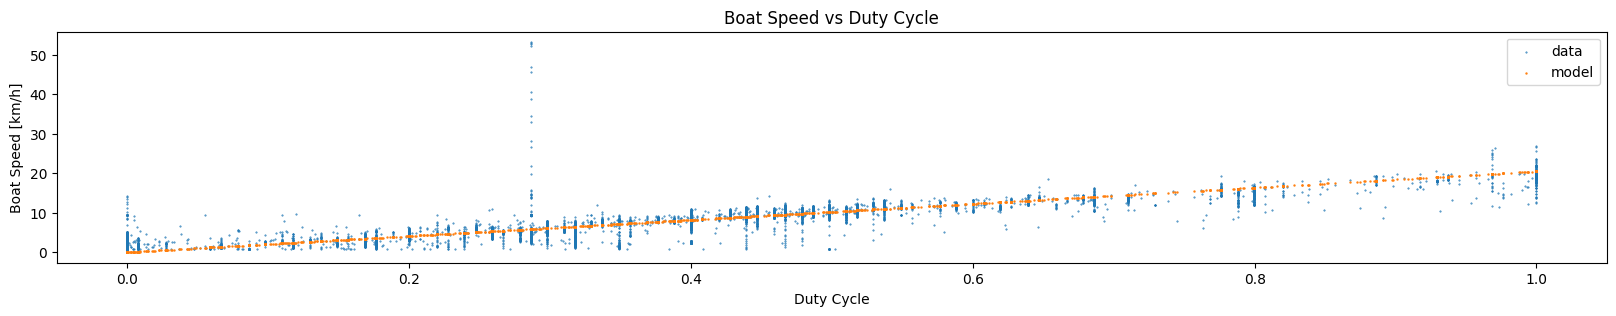

In [1]:
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

df = pd.read_csv('models/2022/boat_data_1s.csv')
df = df.set_index('timestamp')

# Filter
df['gps_speed'] = df['gps_speed'].rolling(10, center=True).mean()
df = df[df['gps_speed'] > 0.8]
df = df.dropna()

def boat_speed_from_dt(dt, a=20.45313876):
    return a*dt

popt, _ = curve_fit(boat_speed_from_dt, df['esc_dt'].to_numpy(), df["gps_speed"].to_numpy())
print(popt)

speed_hat = boat_speed_from_dt(df['esc_dt'].to_numpy(), *popt)

plt.figure(figsize=(20,3))
plt.scatter(df['esc_dt'], df['gps_speed'], label='data', s=0.2)
plt.scatter(df['esc_dt'], speed_hat, label='model', s=0.5)
plt.ylabel("Boat Speed [km/h]")
plt.xlabel("Duty Cycle")
plt.title("Boat Speed vs Duty Cycle")
plt.legend()
plt.show()

[1.24620871]


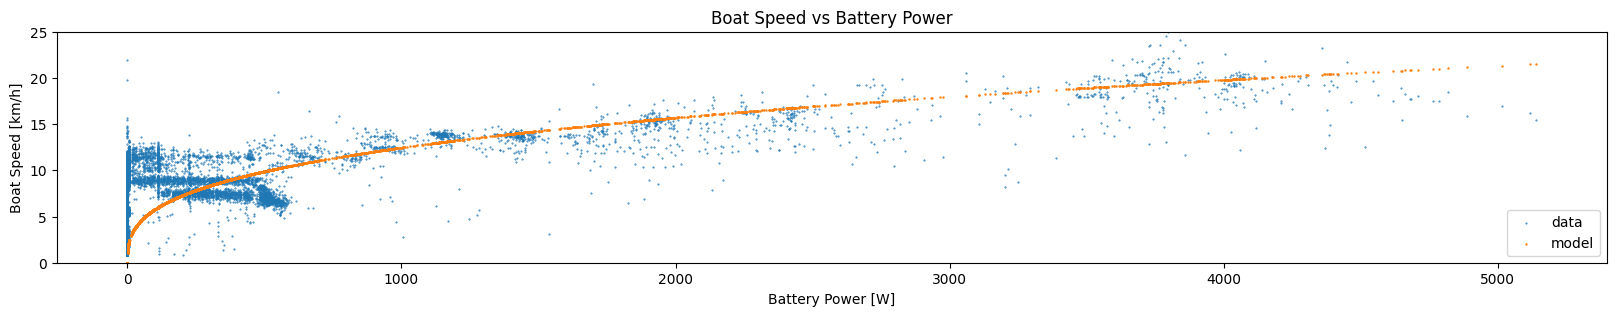

In [2]:
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

df = pd.read_csv('models/2022/boat_data_1s.csv')
df = df.set_index('timestamp')

# Filter
df['gps_speed'] = df['gps_speed'].rolling(10, center=True).mean()
df = df[df['gps_speed'] > 0.8]
df = df.dropna()

def boat_speed_from_power(power, a=1.23484853):
    return a*power**(1/3)

popt, _ = curve_fit(boat_speed_from_power, df['bat_po'].to_numpy(), df["gps_speed"].to_numpy())
print(popt)

speed_hat = boat_speed_from_power(df['bat_po'].to_numpy(), *popt)

plt.figure(figsize=(20,3))
plt.scatter(df['bat_po'], df['gps_speed'], label='data', s=0.2)
plt.scatter(df['bat_po'], speed_hat, label='model', s=0.5)
plt.ylabel("Boat Speed [km/h]")
plt.xlabel("Battery Power [W]")
plt.title("Boat Speed vs Battery Power")
plt.ylim((0, 25))
plt.legend()
plt.show()


### Finding the relationship between ESC duty-cycle and Propeller input power from 2020 data

[2983.76907718]
[4439.73619777]
[2805.81227248   88.02091823]


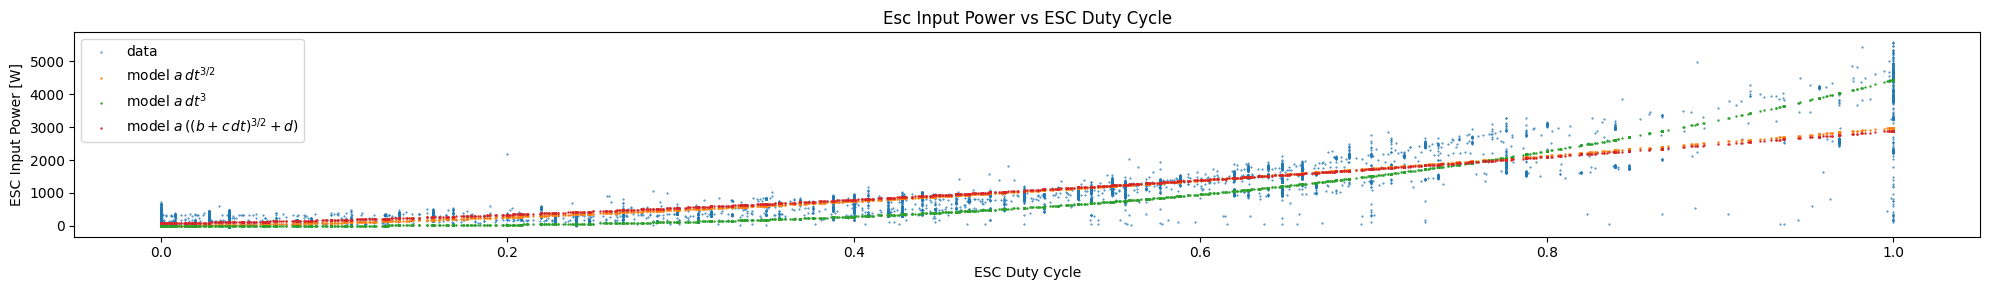

In [3]:
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

df = pd.read_csv('models/2020/boat_data_1s.csv')
df = df.set_index('timestamp')

# Filter
df = df.dropna()

def esc_pi_from_dt(dt, a=2636.15600591):
    return a*dt**(3/2)

def esc_pi_from_dt2(dt, a=4439.73619777):
    return a*dt**(3)

def esc_pi_from_dt3(dt, a, b):
    # A simplification of `a * ((b + c*dt)**(3/2) + d)` for small b and d:
    return a * (dt)**(3/2) + b

popt, _ = curve_fit(esc_pi_from_dt, df['ESC Duty Cycle'].to_numpy(), df["ESC Input Power"].to_numpy())
print(popt)

prop_pi_hat = esc_pi_from_dt(df['ESC Duty Cycle'].to_numpy(), *popt)

popt2, _ = curve_fit(esc_pi_from_dt2, df['ESC Duty Cycle'].to_numpy(), df["ESC Input Power"].to_numpy())
print(popt2)

prop_pi_hat2 = esc_pi_from_dt2(df['ESC Duty Cycle'].to_numpy(), *popt2)

popt3, _ = curve_fit(esc_pi_from_dt3, df['ESC Duty Cycle'].to_numpy(), df["ESC Input Power"].to_numpy())
print(popt3)

prop_pi_hat3 = esc_pi_from_dt3(df['ESC Duty Cycle'].to_numpy(), *popt3)

plt.figure(figsize=(20,3))
plt.scatter(df['ESC Duty Cycle'], df['ESC Input Power'], label='data', s=0.2)
plt.scatter(df['ESC Duty Cycle'], prop_pi_hat, label='model $a\,dt^{3/2}$', s=0.5)
plt.scatter(df['ESC Duty Cycle'], prop_pi_hat2, label='model $a\,dt^{3}$', s=0.5)
plt.scatter(df['ESC Duty Cycle'], prop_pi_hat3, label='model $a\,((b + c\,dt)^{3/2} + d)$', s=0.5)
plt.xlabel("ESC Duty Cycle")
plt.ylabel("ESC Input Power [W]")
plt.title("Esc Input Power vs ESC Duty Cycle")
plt.legend()
plt.tight_layout()
plt.show()


### Finding relationship ESC input Power and Motor RPM

[0.15206408]


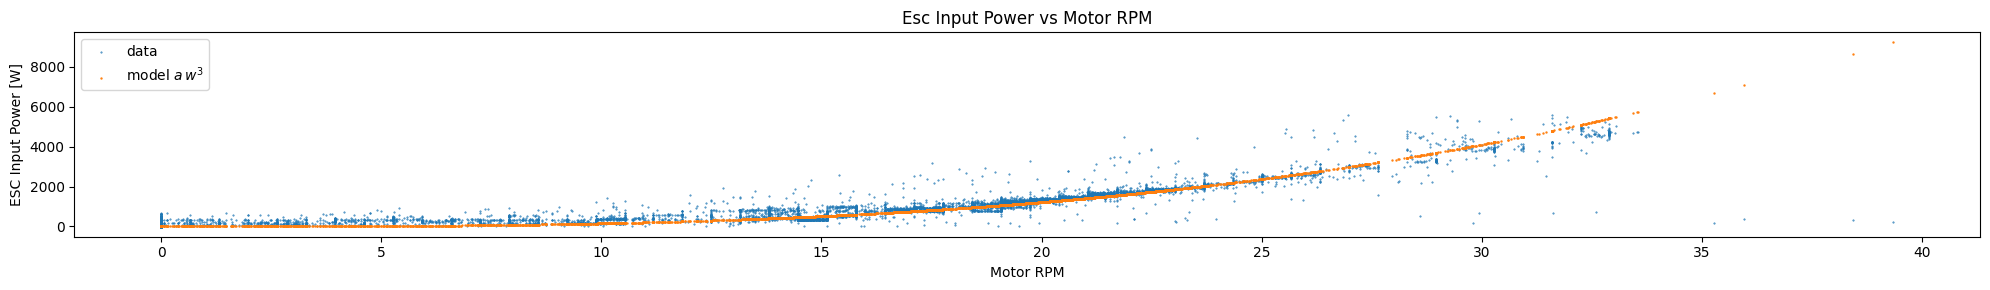

In [4]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

df = pd.read_csv("models/2020/boat_data_1s.csv")
df = df.set_index("timestamp")

# Filter
df = df.dropna()

def esc_pi_from_wm(wm, a=0.15206408):
    return a * wm**3

rpm_to_radps = 2*np.pi / 60

popt, _ = curve_fit(
    esc_pi_from_wm,
    df["Motor Angular Speed"].to_numpy() * rpm_to_radps,
    df["ESC Input Power"].to_numpy(),
)
print(popt)

prop_pi_hat = esc_pi_from_wm(df["Motor Angular Speed"].to_numpy() * rpm_to_radps, *popt)

plt.figure(figsize=(20, 3))
plt.scatter(df["Motor Angular Speed"] * rpm_to_radps, df["ESC Input Power"], label="data", s=0.2)
plt.scatter(df["Motor Angular Speed"] * rpm_to_radps, prop_pi_hat, label="model $a\,w^3$", s=0.5)
plt.xlabel("Motor RPM")
plt.ylabel("ESC Input Power [W]")
plt.title("Esc Input Power vs Motor RPM")
plt.legend()
plt.tight_layout()
plt.show()


### Finding relationship between Boat Speed and ESC Input Power

/tmp/ipykernel_473498/3128076246.py:13: RuntimeWarning: invalid value encountered in power
  speed = a*esc_pi**(1/3)
/tmp/ipykernel_473498/3128076246.py:16: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(speed_from_esc_pi, df['ESC Input Power'].to_numpy(), boat_speed_from_dt(df['ESC Duty Cycle'].to_numpy()))


[1.]


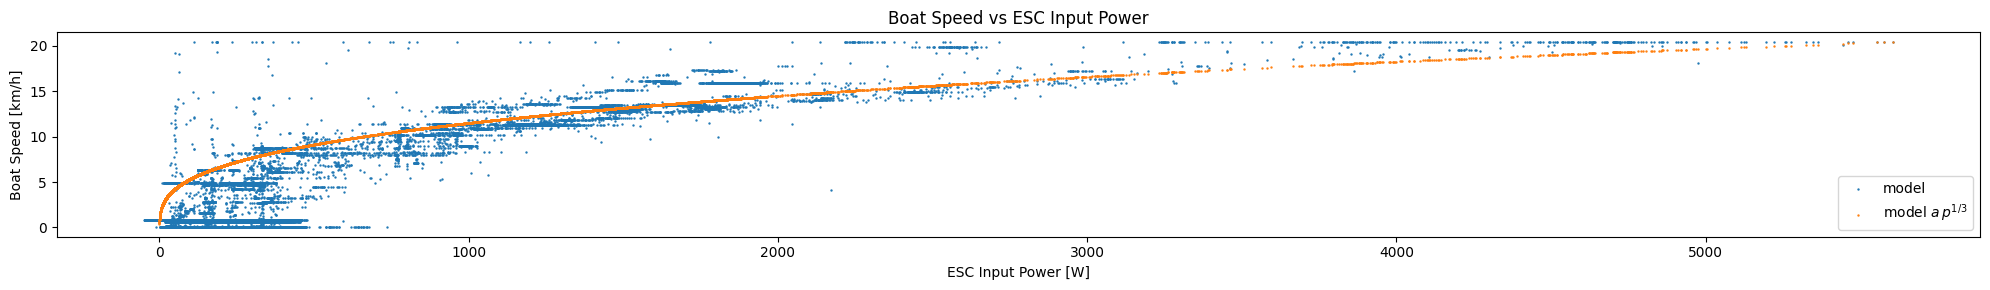

In [5]:
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


df = pd.read_csv('models/2020/boat_data_1s.csv')
df = df.set_index('timestamp')

# Filter
df = df.dropna()

def speed_from_esc_pi(esc_pi, a=1.15):
    speed = a*esc_pi**(1/3)
    return speed  # km/h

popt, _ = curve_fit(speed_from_esc_pi, df['ESC Input Power'].to_numpy(), boat_speed_from_dt(df['ESC Duty Cycle'].to_numpy()))
print(popt)

speed_hat_ref = boat_speed_from_dt(df['ESC Duty Cycle'].to_numpy())
speed_hat = speed_from_esc_pi(df['ESC Input Power'].to_numpy())#, *popt)

plt.figure(figsize=(20,3))
plt.scatter(df['ESC Input Power'], speed_hat_ref, label='model', s=0.5)
plt.scatter(df['ESC Input Power'], speed_hat, label='model $a\,p^{1/3}$', s=0.5)
plt.xlabel("ESC Input Power [W]")
plt.ylabel("Boat Speed [km/h]")
plt.title("Boat Speed vs ESC Input Power")
plt.legend()
plt.tight_layout()
plt.show()

#### Testing the model in 2022 data

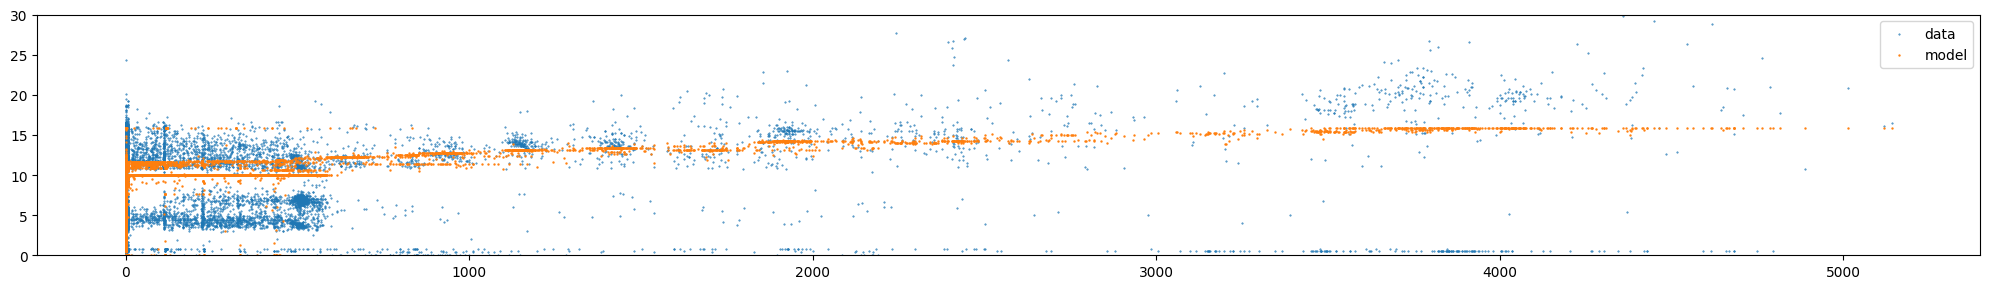

In [6]:
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

df = pd.read_csv('models/2022/boat_data_1s.csv')
df = df.set_index('timestamp')

esc_pi_hat = esc_pi_from_dt(df['esc_dt'].to_numpy())
speed_hat = speed_from_esc_pi(esc_pi_hat)

plt.figure(figsize=(20,3))
plt.scatter(df['bat_po'], df['gps_speed'], label='data', s=0.2)
plt.scatter(df['bat_po'], speed_hat, label='model', s=0.5)
plt.legend()
plt.ylim((0, 30))
plt.tight_layout()
plt.show()

### Applying the model in 2020 data

/tmp/ipykernel_215904/3128076246.py:13: RuntimeWarning: invalid value encountered in power
  speed = a*esc_pi**(1/3)


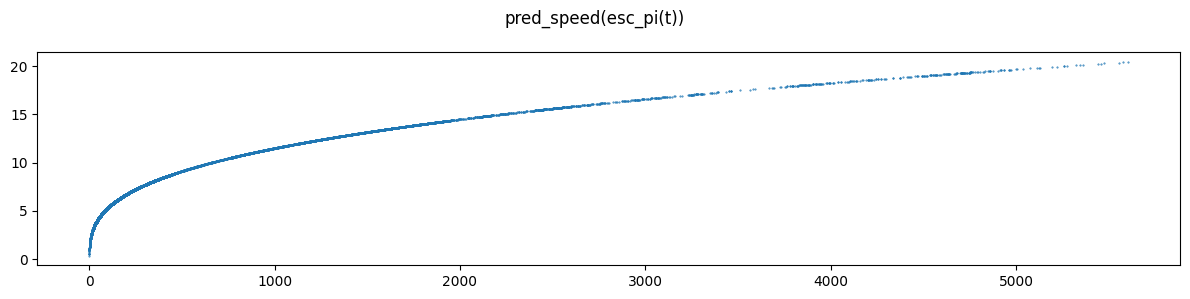

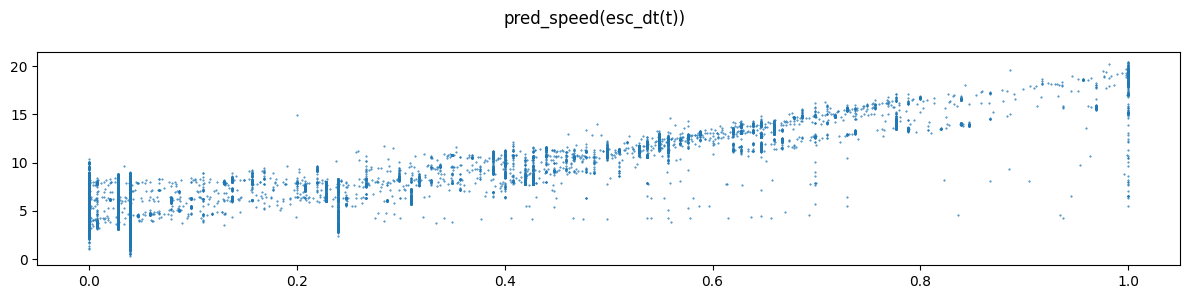

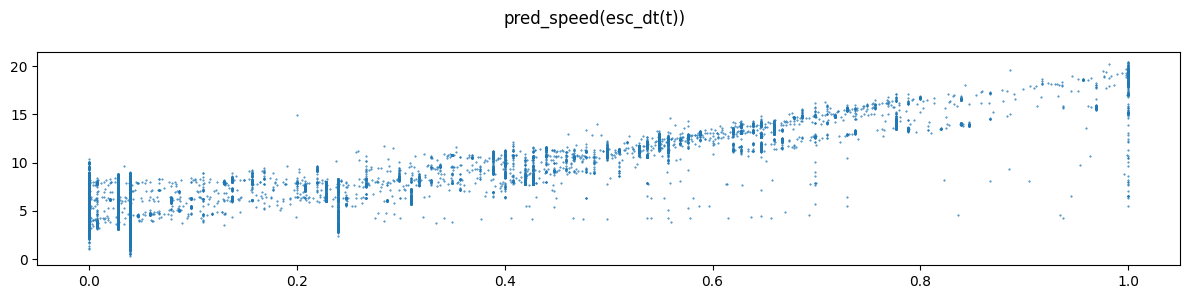

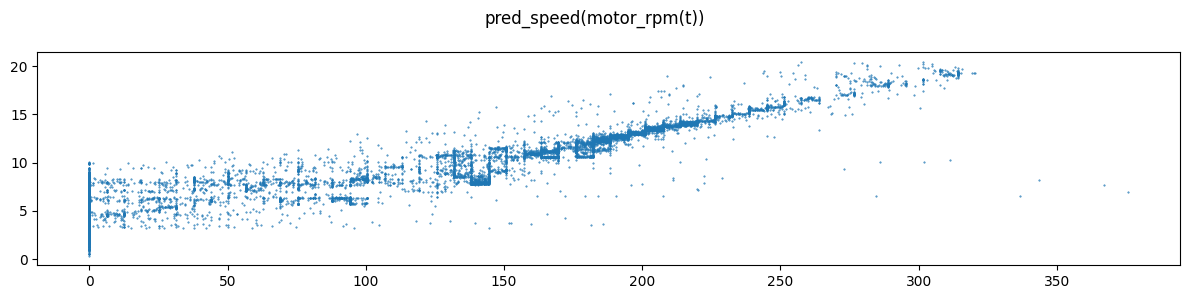

In [70]:
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

df = pd.read_csv('models/2020/boat_data_1s.csv')
df = df.set_index('timestamp')

df['pred_speed'] = speed_from_esc_pi(df['ESC Input Power'].to_numpy())

plt.figure(figsize=(12,3)); plt.suptitle("pred_speed(esc_pi(t))"); plt.scatter(df['ESC Input Power'], df['pred_speed'], s=0.2); plt.tight_layout(); plt.show()

plt.figure(figsize=(12,3)); plt.suptitle("pred_speed(esc_dt(t))"); plt.scatter(df['ESC Duty Cycle'], df['pred_speed'], s=0.2); plt.tight_layout(); plt.show()

plt.figure(figsize=(12,3)); plt.suptitle("pred_speed(esc_dt(t))"); plt.scatter(df['ESC Duty Cycle'], df['pred_speed'], s=0.2); plt.tight_layout(); plt.show()

plt.figure(figsize=(12,3)); plt.suptitle("pred_speed(motor_rpm(t))"); plt.scatter(df['Motor Angular Speed'], df['pred_speed'], s=0.2); plt.tight_layout(); plt.show()

In [72]:
import numpy as np

propeller_pitch = 13  # inches
inches_to_km = 2.54e-5
rpm_to_rph = 60
ideal_prop_speed = (df['prop_rpm'] * rpm_to_rph * propeller_pitch * inches_to_km)  # Theoretical 100% efficiency boat speed in km

prop_eff = df['pred_speed'] / ideal_prop_speed
prop_eff.loc[prop_eff == np.inf] = np.nan
prop_eff.loc[prop_eff > 1] = np.nan

df.to_csv('models/2020/boat_data_1s_pred.csv')

plt.figure(figsize=(12,3))
plt.xlabel("Propeller angular speed [RPM]")
plt.ylabel("Boat speed [km/h]")
plt.plot(df['prop_rpm'], ideal_prop_speed, '--', label='ideal propeller model')
plt.scatter(df['prop_rpm'], df['pred_speed'], label='data model', s=5, alpha=0.2)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,3))
plt.xlabel("Propeller angular speed [RPM]")
plt.ylabel("Propeller efficiency")
plt.scatter(df['prop_rpm'], prop_eff, label='data model', s=5, alpha=0.2)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,3))
plt.xlabel("Power into propeller [W]")
plt.ylabel("Propeller efficiency")
plt.scatter(df['prop_pi'], prop_eff, label='data model', s=5, alpha=0.2)
plt.tight_layout()
plt.show()

KeyError: 'prop_rpm'

#### What are the exptected uncertainties for that model?

#### Testing the model against competition results

In [59]:
import pandas as pd
from pandas import Timestamp
from pytz import timezone
tzinfo = timezone("America/Sao_Paulo")

events = [
    {
        "name": "01.Curta",
        "start": Timestamp(
            year=2020, month=1, day=29, hour=13, minute=51, second=59, tzinfo=tzinfo
        ),
        "end": Timestamp(
            year=2020, month=1, day=29, hour=14, minute=20, second=25, tzinfo=tzinfo
        ),#14:20:25
        "lap_distance": 0.5 * 1.852,
        "laps": 5,
    },
    {
        "name": "02.Longa",
        "start": Timestamp(
            year=2020, month=1, day=30, hour=11, minute=16, second=45, tzinfo=tzinfo
        ),
        "end": Timestamp(
            year=2020, month=1, day=30, hour=14, minute=55, second=30, tzinfo=tzinfo
        ),
        "lap_distance": 2.5 * 1.852,
        "laps": 5,
    },
    {
        "name": "03.Revezamento",
        "start": Timestamp(
            year=2020, month=1, day=31, hour=11, minute=23, second=23, tzinfo=tzinfo
        ),
        "end": Timestamp(
            year=2020, month=1, day=31, hour=12, minute=27, second=23, tzinfo=tzinfo
        ),
        "lap_distance": 0.5 * 1.852,
        "laps": 10,
    },
    {
        "name": "04.Curta",
        "start": Timestamp(
            year=2020, month=2, day=1, hour=10, minute=15, second=15, tzinfo=tzinfo
        ),
        "end": Timestamp(
            year=2020, month=2, day=1, hour=11, minute=37, second=28, tzinfo=tzinfo
        ),#10:53:51
        "lap_distance": 1.0 * 1.852,
        "laps": 5,
    },
    {
        "name": "05.Curta",
        "start": Timestamp(
            year=2020, month=2, day=1, hour=13, minute=15, second=9, tzinfo=tzinfo
        ),
        "end": Timestamp(
            year=2020, month=2, day=1, hour=13, minute=32, second=55, tzinfo=tzinfo
        ),
        "lap_distance": 0.38 * 1.852,
        "laps": 5,
    },
    {
        "name": "07.Sprint",
        "start": Timestamp(
            year=2020, month=2, day=2, hour=11, minute=58, second=27, tzinfo=tzinfo
        ),
        "end": Timestamp(
            year=2020, month=2, day=2, hour=11, minute=59, second=9, tzinfo=tzinfo
        ),
        "lap_distance": 0.1 * 1.852,
        "laps": 1,
    },
]

df = pd.DataFrame(events)
df['distance'] = df['lap_distance'] * df['laps']
df['duration'] = df['end'] - df['start']
df['speed'] = df['distance'] / (df['duration'].to_numpy().astype('float64') / 3600e9)
df

,name,start,end,lap_distance,laps,distance,duration,speed
0,01.Curta,2020-01-29 13:51:59-03:00,2020-01-29 14:20:25-03:00,0.92600,5,4.6300,0 days 00:28:26,9.770223
1,02.Longa,2020-01-30 11:16:45-03:00,2020-01-30 14:55:30-03:00,4.63000,5,23.1500,0 days 03:38:45,6.349714
2,03.Revezamento,2020-01-31 11:23:23-03:00,2020-01-31 12:27:23-03:00,0.92600,10,9.2600,0 days 01:04:00,8.681250
3,04.Curta,2020-02-01 10:15:15-03:00,2020-02-01 11:37:28-03:00,1.85200,5,9.2600,0 days 01:22:13,6.757754
4,05.Curta,2020-02-01 13:15:09-03:00,2020-02-01 13:32:55-03:00,0.70376,5,3.5188,0 days 00:17:46,11.883377
5,07.Sprint,2020-02-02 11:58:27-03:00,2020-02-02 11:59:09-03:00,0.18520,1,0.1852,0 days 00:00:42,15.874286


In [60]:
df = pd.read_csv('models/2020/boat_data_1s.csv')[['timestamp', 'mppt_po', 'bat_po', 'esc_pi', 'trans_pi', 'prop_pi']].dropna()
df["timestamp"] = pd.to_datetime(df["timestamp"])
df['pred_speed'] = speed_from_prop_pi(df['prop_pi'].to_numpy())

for event in events:
    df.loc[(df['timestamp'] > event['start']) & (df['timestamp'] > event['end']), 'event_name'] = event['name']
    df.loc[(df['timestamp'] > event['start']) & (df['timestamp'] > event['end']), 'event_duration'] = event['end'] - event['start']
    df.loc[(df['timestamp'] > event['start']) & (df['timestamp'] > event['end']), 'event_distance'] = event['lap_distance'] * event['laps']
    df.loc[(df['timestamp'] > event['start']) & (df['timestamp'] > event['end']), 'event_speed'] = df['event_distance'] / (df['event_duration'].to_numpy().astype('float64') / 3600e9)

df.groupby("event_name").mean(numeric_only=True)

# plt.scatter(prop_power, df['speed'], label='data')
# plt.plot(prop_power, speed_pred, label='model')
# plt.legend()
# plt.show()

,mppt_po,bat_po,esc_pi,trans_pi,prop_pi,pred_speed,event_distance,event_speed
event_name,,,,,,,,
02.Longa,647.817120,252.704588,678.474165,376.516905,301.213524,5.662720,23.1500,6.349714
03.Revezamento,494.699159,172.444050,419.402221,194.971487,155.977190,2.837889,9.2600,8.681250
04.Curta,871.706404,540.731120,1197.722359,805.451904,644.361523,9.156953,9.2600,6.757754
05.Curta,412.431772,45.005252,267.367683,52.207666,41.766133,1.086964,3.5188,11.883377


In [61]:
import numpy as np
import matplotlib.pyplot as plt

df['po'] = np.array([
    np.NaN,
    np.NaN,
    668.566564,
    np.NaN,
    765.131514,
    3118.723087,
])

df = df.dropna()

Eff_esc = 0.86
Eff_motor = motor_eff(df['po'].to_numpy())
Eff_transmissao = 0.8

prop_power = df['po'].to_numpy() * Eff_esc * Eff_motor * Eff_transmissao
speed_pred = speed_from_prop_pi(prop_power)


ValueError: Length of values (6) does not match length of index (41785)